In [22]:
import pandas as pd
review=pd.read_csv('buffet.csv')

In [23]:
review.shape

(8568, 33)

In [24]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,address,...,business_parking,ambience,categories_array,user_id-2,name-2,review_count-2,yelping_since,fans,elite,average_stars
0,RESDUcs7fIiihp38-d6_6g,0,2017-06-17 16:43:45,0,W5RswgVnEle0W1ZNIljgHw,5,Super fresh seafood. It's worth the wait.\n\nB...,0,SC5EHnwH64t31PjyCttw5A,3570 S Las Vegas Blvd,...,"{'lot': 'FALSE', 'valet': 'TRUE', 'garage': 'T...","{'divey': 'FALSE', 'casual': 'TRUE', 'classy':...","['Restaurants', 'Buffets', 'Sandwiches', 'Food...",SC5EHnwH64t31PjyCttw5A,Dennis,13,2011-06-17 18:19:47,0,NaN,3.92
1,RESDUcs7fIiihp38-d6_6g,0,2015-01-18 15:36:53,0,kjsy2HUCCCuZeh6qn0vcSQ,4,All I can say is Wooow! Haha I was in buffet h...,0,en0xQXlvRk-ZtKlaW4I8eQ,3570 S Las Vegas Blvd,...,"{'lot': 'FALSE', 'valet': 'TRUE', 'garage': 'T...","{'divey': 'FALSE', 'casual': 'TRUE', 'classy':...","['Restaurants', 'Buffets', 'Sandwiches', 'Food...",en0xQXlvRk-ZtKlaW4I8eQ,Aja,10,2014-06-29 00:24:47,0,NaN,3.55
2,RESDUcs7fIiihp38-d6_6g,2,2015-08-19 04:35:10,1,sHrnxaDlMZ5EyOgVNLIkyA,5,We checked in thinking that would mean we coul...,4,h2STke9y3VKzdJA9LXPm7A,3570 S Las Vegas Blvd,...,"{'lot': 'FALSE', 'valet': 'TRUE', 'garage': 'T...","{'divey': 'FALSE', 'casual': 'TRUE', 'classy':...","['Restaurants', 'Buffets', 'Sandwiches', 'Food...",h2STke9y3VKzdJA9LXPm7A,Ashley,378,2010-08-01 19:38:50,28,"2014,2015,2016,2017,2018",4.02
3,RESDUcs7fIiihp38-d6_6g,0,2012-11-06 06:06:19,0,taNGJlUdZqwXrw0AwAAR-Q,5,I PROS | \n- Spacious and clean!! \n- Best qua...,1,T4rXSHtNUOA47GXS63S6mg,3570 S Las Vegas Blvd,...,"{'lot': 'FALSE', 'valet': 'TRUE', 'garage': 'T...","{'divey': 'FALSE', 'casual': 'TRUE', 'classy':...","['Restaurants', 'Buffets', 'Sandwiches', 'Food...",T4rXSHtNUOA47GXS63S6mg,April,606,2012-03-30 04:07:01,47,"2015,2016,2017,2018",3.86
4,RESDUcs7fIiihp38-d6_6g,29,2014-01-17 00:50:50,21,JlNnsvMPLK_1-X2hwzK24w,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",39,IS9yw8P2uAPBX6FNLLX4KA,3570 S Las Vegas Blvd,...,"{'lot': 'FALSE', 'valet': 'TRUE', 'garage': 'T...","{'divey': 'FALSE', 'casual': 'TRUE', 'classy':...","['Restaurants', 'Buffets', 'Sandwiches', 'Food...",IS9yw8P2uAPBX6FNLLX4KA,Richard,1169,2009-03-17 21:58:25,313,"2013,2014,2015,2016,2017",3.84


Data cleaning+EDA+(3分一下poor，3分以上good，每个都做一次麦当劳tfidfcount，然后提建议，保持好的，改善坏的）

# EDA

In [25]:
df1=pd.read_csv('yelp_features_17.csv')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 18 columns):
Unnamed: 0        8568 non-null int64
cool              8568 non-null int64
date              8568 non-null object
funny             8568 non-null int64
review_id         8568 non-null object
stars             8568 non-null int64
text              8568 non-null object
useful            8568 non-null int64
user_id           8568 non-null object
attributes        8568 non-null object
name              8568 non-null object
stars-2           8568 non-null int64
name-2            8568 non-null object
review_count-2    8568 non-null int64
yelping_since     8568 non-null object
fans              8568 non-null int64
elite             2707 non-null object
average_stars     8568 non-null float64
dtypes: float64(1), int64(8), object(9)
memory usage: 1.2+ MB


In [49]:
#NA only appears for Elite, indicating those users with NA entries are not elite.
df=df1.fillna(0)

In [50]:
df=df.drop('Unnamed: 0',axis=1)

In [51]:
df.head()

,cool,date,funny,review_id,stars,text,useful,user_id,attributes,name,stars-2,name-2,review_count-2,yelping_since,fans,elite,average_stars
0,0,2017-06-17 16:43:45,0,W5RswgVnEle0W1ZNIljgHw,5,Super fresh seafood. It's worth the wait.\n\nB...,0,SC5EHnwH64t31PjyCttw5A,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...",Bacchanal Buffet,4,Dennis,13,2011-06-17 18:19:47,0,0,3.92
1,0,2015-01-18 15:36:53,0,kjsy2HUCCCuZeh6qn0vcSQ,4,All I can say is Wooow! Haha I was in buffet h...,0,en0xQXlvRk-ZtKlaW4I8eQ,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...",Bacchanal Buffet,4,Aja,10,2014-06-29 00:24:47,0,0,3.55
2,2,2015-08-19 04:35:10,1,sHrnxaDlMZ5EyOgVNLIkyA,5,We checked in thinking that would mean we coul...,4,h2STke9y3VKzdJA9LXPm7A,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...",Bacchanal Buffet,4,Ashley,378,2010-08-01 19:38:50,28,"2014,2015,2016,2017,2018",4.02
3,0,2012-11-06 06:06:19,0,taNGJlUdZqwXrw0AwAAR-Q,5,I PROS | \n- Spacious and clean!! \n- Best qua...,1,T4rXSHtNUOA47GXS63S6mg,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...",Bacchanal Buffet,4,April,606,2012-03-30 04:07:01,47,"2015,2016,2017,2018",3.86
4,29,2014-01-17 00:50:50,21,JlNnsvMPLK_1-X2hwzK24w,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",39,IS9yw8P2uAPBX6FNLLX4KA,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...",Bacchanal Buffet,4,Richard,1169,2009-03-17 21:58:25,313,"2013,2014,2015,2016,2017",3.84


In [52]:
df=df.drop('name',axis=1)

In [53]:
#After data cleaning, in total we have 16 columns and 8568 reviews.
df['stars'].value_counts()

5    3399
4    2276
3    1300
1     830
2     763
Name: stars, dtype: int64

In [127]:
## add column 'class' for good or bad reviews

for i in range(df.shape[0]):
    if df.loc[i, 'stars'] >= 3:
        df.loc[i,'class'] = 1    # 1 for good
        
    else:
        df.loc[i, 'class'] = 0

In [128]:
df['class']=df['class'].astype(int)

In [144]:
df.to_csv("yelp_cleaned_data.csv")

In [1]:
import pandas as pd
df=pd.read_csv("yelp_cleaned_data.csv")

In [2]:
## devide our reviews to good and bad
good=df[df['class']==1]
bad=df[df['class']==0]

In [3]:
good_reviews=list(good['text'].values)
bad_reviews=list(bad['text'].values)

In [131]:
bad_reviews

['Not worth it! Too salty food and expensive! This is our furst and kast visit on this buffet!',
 "Worst dining experience ever! The waiting time was incredibly long. The computer told us it was about 2 hours, which was already long enough, but then we waited for more than 3 hours standing in the line. The line kept been cutting in by the so-called diamond,platinum vip people.... we paid $80 per person and the service we got was not even a silver level. Horrible place to eat, not worth the best buffet in LV at all! Don't eat by two people, go with a group at least the line will be faster.",
 "Tried the breakfast buffet before a flight back to NY.\nExtremely disappointing. Pretty much everything was cold, even the oatmeal. Cold and burnt hash browns, yuk!! No smoked salmon!! They had these little egg dishes which were gross!! \nDeserts were ok but I'm not looking for Creme Brûlée at 9:00am\nWill save the $32 and go to ihop next time!!",
 'Be careful using the restroom here. While I was 

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
wd=stopwords.words()+['bacchanal','buffet','food','good','like','best','worth','vegas','back','tried','year','crab','story','definitely','really']

vectorizer = TfidfVectorizer(ngram_range=(3,4),
                             token_pattern=r'\b[a-zA-Z]{3,}\b',
                             max_df=0.4,
                             min_df=2, stop_words=wd)

In [133]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import string
lemmatizer = WordNetLemmatizer()
def lemmatize_sentence(sentence):
    words = word_tokenize(sentence)
    res_words = []
    for word in words:
        res_words.append(lemmatizer.lemmatize(word).strip(string.punctuation))
    return " ".join(res_words)

In [134]:
X = vectorizer.fit_transform(good_reviews)
terms = vectorizer.get_feature_names()
tf_idf= pd.DataFrame(X.toarray().transpose(), index=terms)
tf_idf = tf_idf.sum(axis=1)
score = pd.DataFrame(tf_idf, columns=["score"])
score["term"] = terms
score.sort_values(by="score", ascending=False, inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'printr', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [140]:
score30=score.head(30)

In [141]:
score30.to_csv('good_reviews_tfidf.csv')



![alt text](goodreviewspic.jpg)

In [136]:
Y = vectorizer.fit_transform(bad_reviews)
terms = vectorizer.get_feature_names()
tf_idf1= pd.DataFrame(Y.toarray().transpose(), index=terms)
tf_idf1 = tf_idf1.sum(axis=1)
score1 = pd.DataFrame(tf_idf1, columns=["score"])
score1["term"] = terms
score1.sort_values(by="score", ascending=False, inplace=True)

In [142]:
score31=score1.head(30)

In [143]:
score31.to_csv('badreviews.csv')


![alt text](badreviewspic.jpg)

In [ ]:
##Sentimenal Analysis

In [4]:
reviews_df=df[['text','class']]

In [5]:
reviews_df.head()

,text,class
0,Super fresh seafood. It's worth the wait.\n\nB...,1
1,All I can say is Wooow! Haha I was in buffet h...,1
2,We checked in thinking that would mean we coul...,1
3,I PROS | \n- Spacious and clean!! \n- Best qua...,1
4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",1


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
wd=stopwords.words()+['bacchanal','buffet','food','good','like','best','worth','vegas','back','tried','year','crab','story','definitely','really']


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), 
                             stop_words=wd, 
                             max_features=1000,token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')

In [57]:
X = vectorizer.fit_transform(reviews_df["text"])
y = reviews_df["class"].values
X

<8568x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 362000 stored elements in Compressed Sparse Row format>

In [59]:
terms = vectorizer.get_feature_names()
reviews_df1=pd.DataFrame(X.toarray().transpose(), index=terms)

In [60]:
reviews_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,8558,8559,8560,8561,8562,8563,8564,8565,8566,8567
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
actual,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
actually,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
add,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
reviews_df1=reviews_df1.transpose()

In [63]:
reviews_df1.head()

,able,absolutely,actual,actually,add,added,additional,afternoon,ago,ahead,...,wow,wrong,wynn,yeah,years,yelp,yes,yet,yum,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
reviews_df1['class']=y

In [65]:
reviews_df1.head()

,able,absolutely,actual,actually,add,added,additional,afternoon,ago,ahead,...,wrong,wynn,yeah,years,yelp,yes,yet,yum,yummy,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [66]:
reviews_df1['class'].value_counts()

1    6975
0    1593
Name: class, dtype: int64

In [ ]:
##export to csv

In [67]:
reviews_df1.to_csv("reviews_dataset.csv")

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(reviews_df)
X_train = train_df.loc[:, ~train_df.columns.isin(['class'])]
X_test = test_df.loc[:, ~test_df.columns.isin(['class'])]


y_train = train_df["class"]
y_test = test_df["class"]

In [11]:
X_train = vectorizer.fit_transform(train_df["text"])
y_train = train_df["class"].values
X_train

<6426x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 271581 stored elements in Compressed Sparse Row format>

In [12]:
X_test = vectorizer.fit_transform(test_df["text"])
y_test = test_df["class"].values
X_test

<2142x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 90676 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [16]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [17]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 5, min_samples_leaf = 2)

In [18]:
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [36]:
from sklearn import tree

In [19]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [45]:
y_pred = clf_entropy.predict(X_test)

In [46]:
confusion_matrix(y_test, y_pred)

array([[  87,  323],
       [ 348, 1384]])

In [47]:
accuracy_score(y_test,y_pred)*100

68.67413632119515

In [48]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.20      0.21      0.21       410\n           1       0.81      0.80      0.80      1732\n\n   micro avg       0.69      0.69      0.69      2142\n   macro avg       0.51      0.51      0.51      2142\nweighted avg       0.69      0.69      0.69      2142\n'

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5056356672111756

In [52]:
import graphviz 
dot_data = tree.export_graphviz(clf_entropy, out_file=None) 
graph = graphviz.Source(dot_data) 

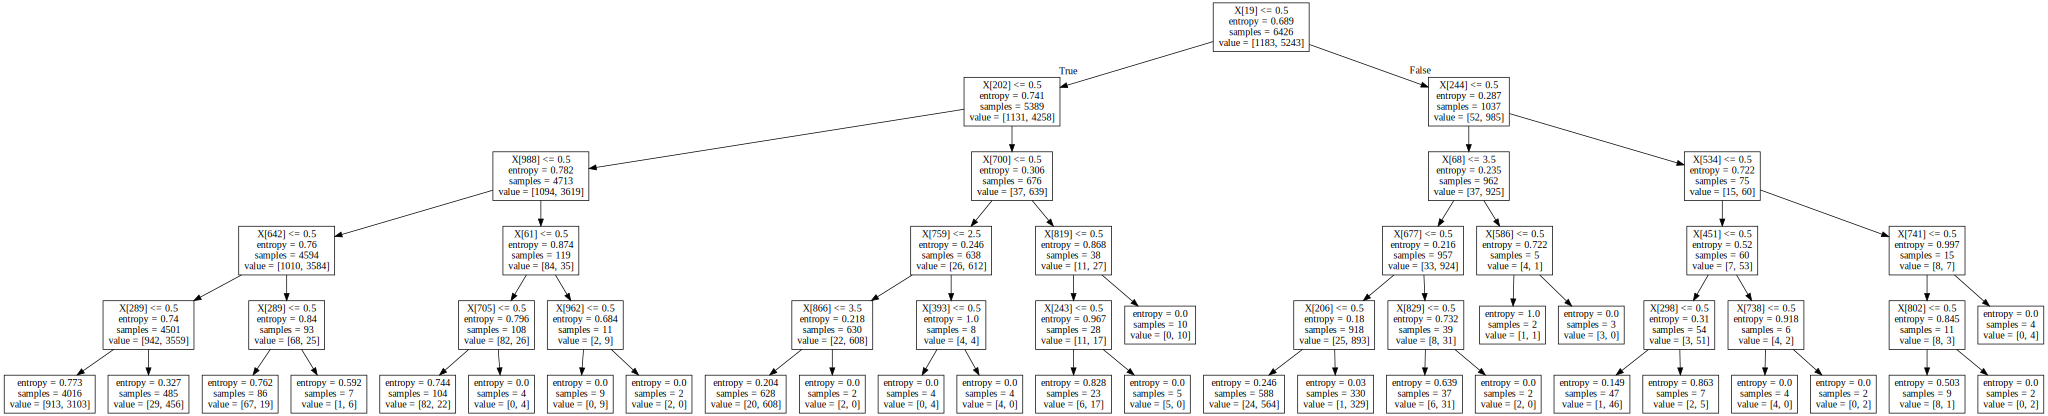

In [53]:
graph